In [15]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [16]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.colors as colors

rc('font', **{'family':'serif', 'serif':['Computer Modern Roman'], 'monospace': ['Computer Modern Typewriter']})
rc('text', usetex=True)

matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['image.origin'] = 'lower'

from package.plots import overplot
from package.helpers import test_physical_lens, test_physical_lens_2

In [17]:
figure_dir = os.path.join(repo_path, 'figures')
array_dir = os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'pixel_density_test')

In [18]:
oversample_factor = 9

pandeia = np.load(os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'pixel_density_test', f'detector_{oversample_factor}.npy'))

lens = test_physical_lens.TestPhysicalLens()
num_pix = 45

model = lens.get_array(num_pix=num_pix)

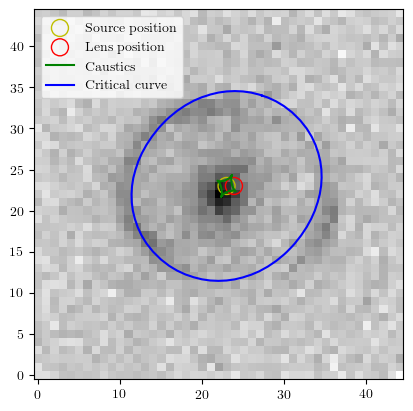

In [22]:
fig, ax = plt.subplots()

ax.imshow(np.log10(pandeia), cmap='binary')

overplot.source_position(ax, lens)
overplot.lens_position(ax, lens)
overplot.caustics(ax, lens)
overplot.critical_curves(ax, lens)

plt.legend()

plt.savefig(os.path.join(figure_dir, 'roman_image.png'))
plt.show()